# Question and Answer Chat Bots

## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- **Paper** : Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698

In [37]:
import pickle
import numpy as np

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
with open("/content/gdrive/MyDrive/ml/my_learning/NLP - Natural Language Processing with Python -06-Deep-Learning/train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [40]:
with open("/content/gdrive/MyDrive/ml/my_learning/NLP - Natural Language Processing with Python -06-Deep-Learning/test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

## Exploring the Data

In [41]:
type(test_data),type(train_data)

(list, list)

In [42]:
len(train_data),len(test_data)

(10000, 1000)

In [43]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [44]:
# answer
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [45]:
# question
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [46]:
train_data[0][2]

'no'

In [47]:
#First we need to create a vocabulary with our data
#For this we will use the training data only to - On the video it uses both
#train and test 
#Might have to use training and test later, as the dataset has very
#few words
#First we will build a set of all the words in the dataset:
vocab = set()
for story, question, answer in train_data:
    vocab = vocab.union(set(story)) #Set returns unique words in the sentence
                                    #Union returns the unique common elements from a two sets
    vocab = vocab.union(set(question))

In [48]:
vocab.add('no')
vocab.add('yes')

In [49]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [50]:
#Calculate len and add 1 for Keras placeholder - Placeholders are used to feed in the data to the network. 
#They need a data type, and have optional shape arguements.
#They will be empty at first, and then the data will get fed into the placeholder
vocab_len = len(vocab) + 1
vocab_len

38

#Now we are going to calculate the longest story and the longest question
#We need this for the Keras pad sequences. 
#Keras training layers expect all of the input to have the same length, so 
#we need to pad 


In [51]:
#Now we are going to calculate the longest story and the longest question
#We need this for the Keras pad sequences. 
#Keras training layers expect all of the input to have the same length, so 
#we need to pad 
all_data = test_data + train_data

In [61]:
all_story_lens = [len(data[0]) for data in all_data]
max_story_len = (max(all_story_lens))
max_question_len = max([len(data[1]) for data in all_data])
print(max_story_len,max_question_len)

156 6


#Vectorizing the data
First, we will go through a manual process of how to vectorize the data, and then we will create a function that does this automatically for us.

In [53]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [54]:
#Create an instance of the tokenizer object:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [55]:
#Dictionary that maps every word in our vocab to an index
# It has been automatically lowercased
#This tokenizer can give different indexes for different words depending on when we run it
tokenizer.word_index

{'took': 1,
 'went': 2,
 'journeyed': 3,
 'grabbed': 4,
 'sandra': 5,
 'kitchen': 6,
 'got': 7,
 'no': 8,
 'hallway': 9,
 '?': 10,
 'down': 11,
 'bathroom': 12,
 'bedroom': 13,
 'left': 14,
 'football': 15,
 'the': 16,
 'to': 17,
 'office': 18,
 'in': 19,
 'milk': 20,
 'put': 21,
 'up': 22,
 'garden': 23,
 'dropped': 24,
 'moved': 25,
 'john': 26,
 'travelled': 27,
 'apple': 28,
 'discarded': 29,
 'yes': 30,
 'back': 31,
 'mary': 32,
 'daniel': 33,
 'is': 34,
 'picked': 35,
 'there': 36,
 '.': 37}

In [56]:
#Tokenize the stories, questions and answers:
train_story_text = []
train_question_text = []
train_answers = []
#Separating each of the elements
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question) 
    train_answers.append(answer)

In [57]:
#Coverting the text into the indexes 
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
train_story_seq

[[32, 25, 17, 16, 12, 37, 5, 3, 17, 16, 13, 37],
 [32,
  25,
  17,
  16,
  12,
  37,
  5,
  3,
  17,
  16,
  13,
  37,
  32,
  2,
  31,
  17,
  16,
  13,
  37,
  33,
  2,
  31,
  17,
  16,
  9,
  37],
 [32,
  25,
  17,
  16,
  12,
  37,
  5,
  3,
  17,
  16,
  13,
  37,
  32,
  2,
  31,
  17,
  16,
  13,
  37,
  33,
  2,
  31,
  17,
  16,
  9,
  37,
  5,
  2,
  17,
  16,
  6,
  37,
  33,
  2,
  31,
  17,
  16,
  12,
  37],
 [32,
  25,
  17,
  16,
  12,
  37,
  5,
  3,
  17,
  16,
  13,
  37,
  32,
  2,
  31,
  17,
  16,
  13,
  37,
  33,
  2,
  31,
  17,
  16,
  9,
  37,
  5,
  2,
  17,
  16,
  6,
  37,
  33,
  2,
  31,
  17,
  16,
  12,
  37,
  33,
  35,
  22,
  16,
  15,
  36,
  37,
  33,
  2,
  17,
  16,
  13,
  37],
 [32,
  25,
  17,
  16,
  12,
  37,
  5,
  3,
  17,
  16,
  13,
  37,
  32,
  2,
  31,
  17,
  16,
  13,
  37,
  33,
  2,
  31,
  17,
  16,
  9,
  37,
  5,
  2,
  17,
  16,
  6,
  37,
  33,
  2,
  31,
  17,
  16,
  12,
  37,
  33,
  35,
  22,
  16,
  15,
  36,
  37,
  3

In [58]:
#Create a function for vectorizing the stories, questions and answers:
def vectorize_stories(data,word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    #vectorized stories:
    X = []
    #vectorized questions:
    Xq = []
    #vectorized answers:
    Y = []
    
    for story, question, answer in data:
        #Getting indexes for each word in the story
        x = [word_index[word.lower()] for word in story]
        #Getting indexes for each word in the story
        xq = [word_index[word.lower()] for word in question]
        #For the answers
        y = np.zeros(len(word_index) + 1) #Index 0 Reserved when padding the sequences
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    #Now we have to pad these sequences:
    return(pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [59]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)
inputs_train.shape, questions_train.shape, answers_train.shape

((10000, 156), (10000, 6), (10000, 38))

In [60]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)
inputs_test.shape, questions_test.shape, answers_test.shape

((1000, 156), (1000, 6), (1000, 38))

In [62]:
inputs_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 32, 25, 17, 16, 12, 37,  5,  3, 17,
       16, 13, 37], dtype=int32)

In [63]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [64]:
train_story_seq[0]

[32, 25, 17, 16, 12, 37, 5, 3, 17, 16, 13, 37]

#Building the Network

In [66]:
#Imports
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [67]:
# We need to create the placeholders 
#The Input function is used to create a keras tensor
#PLACEHOLDER shape = (max_story_len,batch_size)
#These are our placeholder for the inputs, ready to recieve batches of the stories and the questions
input_sequence = Input((max_story_len,)) #As we dont know batch size yet
question = Input((max_question_len,))

In [68]:
#Create input encoder M:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))

#Outputs: (Samples, story_maxlen,embedding_dim) -- Gives a list of the lenght of the samples where each item has the
#lenght of the max story lenght and every word is embedded in the embbeding dimension

In [69]:
#Create input encoder C:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

#Outputs: (samples, story_maxlen, max_question_len)

In [70]:
#Create question encoder:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

#Outputs: (samples, question_maxlen, embedding_dim)

In [71]:
#Now lets encode the sequences, passing the placeholders into our encoders:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [72]:
#Use dot product to compute similarity between input encoded m and question 
#Like in the paper:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [73]:
#For the response we want to add this match with the ouput of input_encoded_c
response = add([match,input_encoded_c])
response = Permute((2,1))(response) #Permute Layer: permutes dimensions of input

In [74]:
#Once we have the response we can concatenate it with the question encoded:
answer = concatenate([response, question_encoded])

In [75]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [76]:
# Reduce the answer tensor with a RNN (LSTM)
answer = LSTM(32)(answer)

In [77]:
#Regularization with dropout:
answer = Dropout(0.5)(answer)
#Output layer:
answer = Dense(vocab_len)(answer) #Output shape: (Samples, Vocab_size) #Yes or no and all 0s

In [78]:
#Now we need to output a probability distribution for the vocab, using softmax:
answer = Activation('softmax')(answer)

In [79]:
#Now we build the final model:
model = Model([input_sequence,question], answer)

In [80]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Categorical instead of binary cross entropy as because of the way we are training
#we could actually see any of the words from the vocab as output
#however, we should only see yes or no

In [81]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

#Training and testing the model

In [82]:
history = model.fit([inputs_train,questions_train],answers_train, batch_size = 32, epochs = 1000, validation_data = ([inputs_test,questions_test],answers_test))


Epoch 1/1000
313/313 [==============================] - 9s 7ms/step - loss: 0.8960 - accuracy: 0.4933 - val_loss: 0.6984 - val_accuracy: 0.4970
Epoch 2/1000
313/313 [==============================] - 2s 6ms/step - loss: 0.7032 - accuracy: 0.5055 - val_loss: 0.6955 - val_accuracy: 0.5030
Epoch 3/1000
313/313 [==============================] - 2s 6ms/step - loss: 0.6970 - accuracy: 0.4942 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 4/1000
313/313 [==============================] - 2s 6ms/step - loss: 0.6952 - accuracy: 0.4979 - val_loss: 0.6947 - val_accuracy: 0.5030
Epoch 5/1000
313/313 [==============================] - 2s 6ms/step - loss: 0.6946 - accuracy: 0.5026 - val_loss: 0.6943 - val_accuracy: 0.5030
Epoch 6/1000
313/313 [==============================] - 2s 6ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 7/1000
313/313 [==============================] - 2s 6ms/step - loss: 0.6945 - accuracy: 0.5014 - val_loss: 0.6950 - val_accuracy:

In [83]:
filename = '/content/gdrive/MyDrive/ml/my_learning/NLP - Natural Language Processing with Python -06-Deep-Learning/Z_chatbot_1000_epochs.h5'
model.save(filename)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


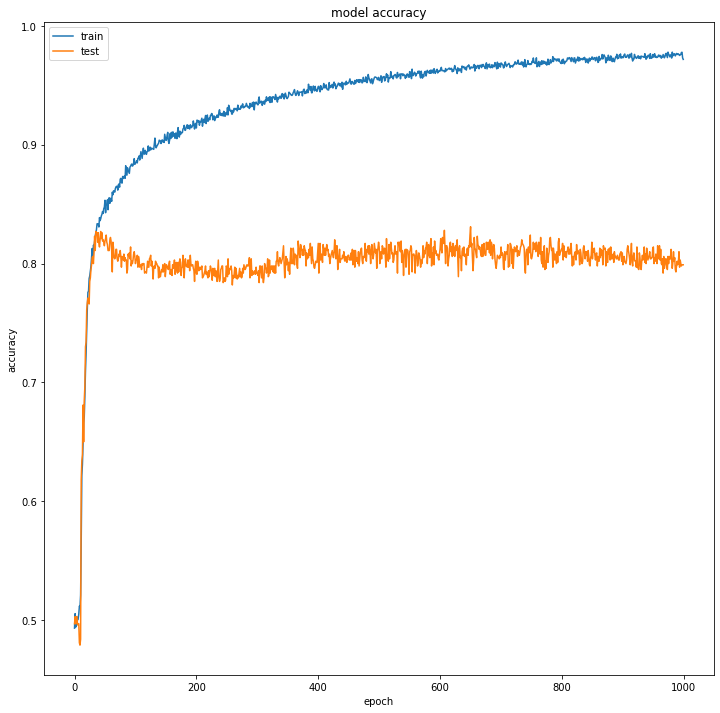

In [86]:
#Lets plot the increase of accuracy as we increase the number of training epochs
#We can see that without any training the acc is about 50%, random guessing
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
#To load a model that we have already trained and saved:
model.load_weights('/content/gdrive/MyDrive/ml/my_learning/NLP - Natural Language Processing with Python -06-Deep-Learning/Z_chatbot_1000_epochs.h5')

In [88]:
#Lets check out the predictions on the test set:
#These are just probabilities for every single word on the vocab
pred_results = model.predict(([inputs_test,questions_test]))

32/32 [==============================] - 0s 2ms/step


In [89]:
#First test data point
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [90]:
#These are the probabilities for the vocab words using the 1st sentence
pred_results[0]

array([7.6771780e-15, 7.6692167e-15, 7.7065793e-15, 7.6842101e-15,
       7.9687631e-15, 7.4209632e-15, 8.7099415e-15, 7.6448264e-15,
       9.9999821e-01, 7.5711684e-15, 8.3711572e-15, 7.4337128e-15,
       7.8175839e-15, 7.6721127e-15, 7.9653886e-15, 7.3483683e-15,
       7.5291183e-15, 7.2547000e-15, 8.1339024e-15, 7.7378044e-15,
       7.6431061e-15, 8.3579799e-15, 7.8066182e-15, 7.3654876e-15,
       7.7756193e-15, 8.6229614e-15, 6.8893687e-15, 7.1838423e-15,
       7.4551249e-15, 7.9680940e-15, 1.7423021e-06, 7.5944254e-15,
       8.0491127e-15, 8.0169983e-15, 7.9165275e-15, 8.0049577e-15,
       8.2304430e-15, 8.0593440e-15], dtype=float32)

In [91]:
val_max = np.argmax(pred_results[0])

In [92]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

no


In [93]:
#See probability:
pred_results[0][val_max]

0.9999982

In [94]:
#Now, we can make our own questions using the vocabulary we have
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [95]:
my_story = 'Sandra picked up the milk . Mary travelled left . '
my_story.split()

['Sandra',
 'picked',
 'up',
 'the',
 'milk',
 '.',
 'Mary',
 'travelled',
 'left',
 '.']

In [96]:
my_question = 'Sandra got the milk ?'
my_question.split()

['Sandra', 'got', 'the', 'milk', '?']

In [98]:
#Put the data in the same format as before
my_data = [(my_story.split(), my_question.split(),'yes')]
my_data

[(['Sandra',
   'picked',
   'up',
   'the',
   'milk',
   '.',
   'Mary',
   'travelled',
   'left',
   '.'],
  ['Sandra', 'got', 'the', 'milk', '?'],
  'yes')]

In [99]:
#Vectorize this data
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [105]:
#Make the prediction
pred_results = model.predict(([my_story,my_ques]))

1/1 [==============================] - 0s 19ms/step


In [106]:
val_max = np.argmax(pred_results[0])

In [107]:
#Correct prediction!
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

yes


In [108]:
#Confidence
pred_results[0][val_max]

0.63119406